# *Representing Neural Networks*

### Generating Regression Data

In [1]:
from sklearn.datasets import make_regression
import pandas as pd

data = make_regression(n_samples=100, n_features=3, random_state=1)

features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

print(labels.head())
features.head()

0    -10.378660
1     25.512450
2     19.677056
3    149.502054
4   -121.652109
dtype: float64


,0,1,2
0,1.293226,-0.617362,-0.110447
1,-2.793085,0.366332,1.937529
2,0.801861,-0.186570,0.046567
3,0.129102,0.502741,1.616950
4,-0.691661,-0.687173,-0.396754


### Fitting a Linear Regression Neural Network

In [2]:
from sklearn.linear_model import SGDRegressor
import numpy as np

features['bias'] = 1

def train(X, y):    
    lr = SGDRegressor()
    lr.fit(X,y)
    
    return lr.coef_

def feedforward(X, w):
    return np.dot(X, w)

train_weights = train(features, labels)
linear_predictions = feedforward(features, train_weights)

print(train_weights[:5])
linear_predictions[:5]

[30.03267023 65.28760995 36.95290861  4.00128016]


/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([ -1.54712587,  15.6317463 ,  17.62341073, 100.4522867 ,
       -76.29619913])

### Generate Classification Data

In [3]:
from sklearn.datasets import make_classification

class_data = make_classification(n_samples=100, n_features=4, random_state=1)

class_features = pd.DataFrame(class_data[0])
class_labels = pd.Series(class_data[1])

print(class_labels.head())
class_features.head()

0    0
1    1
2    1
3    0
4    1
dtype: int64


,0,1,2,3
0,2.257082,3.174625,2.783862,-0.478191
1,1.350390,1.949810,1.760475,-0.403942
2,1.159745,1.119558,0.468043,0.949132
3,-1.360882,-1.425550,-0.759553,-0.852599
4,0.033744,-0.675969,-1.319113,1.682271


### Implementing A Neural Network That Performs Classification

In [4]:
class_features.head()

,0,1,2,3
0,2.257082,3.174625,2.783862,-0.478191
1,1.350390,1.949810,1.760475,-0.403942
2,1.159745,1.119558,0.468043,0.949132
3,-1.360882,-1.425550,-0.759553,-0.852599
4,0.033744,-0.675969,-1.319113,1.682271


In [5]:
from sklearn.linear_model import SGDClassifier

class_features['bias'] = 1

def log_train(X, y):
    clf = SGDClassifier()
    clf.fit(X, y)
    
    return clf.coef_

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def log_feedforward(X, w):
    linear_combination = np.dot(X, w.T)
    log_predictions = sigmoid(linear_combination)
    
    log_predictions[log_predictions <= 0.5] = 0
    log_predictions[log_predictions > 0.5] = 1
    
    return log_predictions

# Uncomment this code when you're ready to test your functions.
log_train_weights = log_train(class_features, class_labels)
log_predictions = log_feedforward(class_features, log_train_weights)

log_predictions

print(log_train_weights.shape)
log_predictions[:5]

(1, 5)


/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([[0.],
       [0.],
       [1.],
       [0.],
       [1.]])

# *Representing Neural Networks*
### ReLu Activation Function

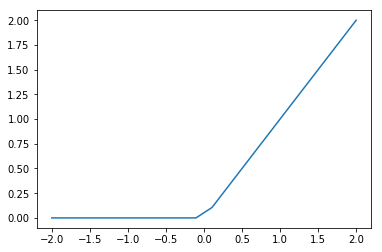

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
x = np.linspace(-2, 2, 20)

def relu(x):
    return np.maximum(x, 0)
        
relu_y = relu(x)
plt.plot(x, relu_y)
plt.show()

### Trignometric Functions

[-6.28318531 -6.15625227 -6.02931923 -5.9023862  -5.77545316 -5.64852012
 -5.52158709 -5.39465405 -5.26772102 -5.14078798 -5.01385494 -4.88692191
 -4.75998887 -4.63305583 -4.5061228  -4.37918976 -4.25225672 -4.12532369
 -3.99839065 -3.87145761 -3.74452458 -3.61759154 -3.4906585  -3.36372547
 -3.23679243 -3.10985939 -2.98292636 -2.85599332 -2.72906028 -2.60212725
 -2.47519421 -2.34826118 -2.22132814 -2.0943951  -1.96746207 -1.84052903
 -1.71359599 -1.58666296 -1.45972992 -1.33279688 -1.20586385 -1.07893081
 -0.95199777 -0.82506474 -0.6981317  -0.57119866 -0.44426563 -0.31733259
 -0.19039955 -0.06346652  0.06346652  0.19039955  0.31733259  0.44426563
  0.57119866  0.6981317   0.82506474  0.95199777  1.07893081  1.20586385
  1.33279688  1.45972992  1.58666296  1.71359599  1.84052903  1.96746207
  2.0943951   2.22132814  2.34826118  2.47519421  2.60212725  2.72906028
  2.85599332  2.98292636  3.10985939  3.23679243  3.36372547  3.4906585
  3.61759154  3.74452458  3.87145761  3.99839065  4.

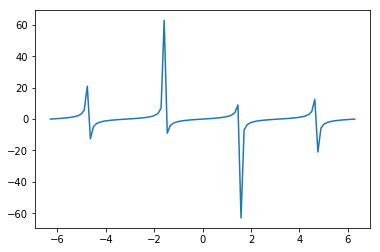

In [7]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

tan_y = np.tan(x)

print(x)
print(tan_y)

plt.plot(x, tan_y)
plt.show()

### Hyperbolic Tangent Function

[-40.         -39.19191919 -38.38383838 -37.57575758 -36.76767677
 -35.95959596 -35.15151515 -34.34343434 -33.53535354 -32.72727273
 -31.91919192 -31.11111111 -30.3030303  -29.49494949 -28.68686869
 -27.87878788 -27.07070707 -26.26262626 -25.45454545 -24.64646465
 -23.83838384 -23.03030303 -22.22222222 -21.41414141 -20.60606061
 -19.7979798  -18.98989899 -18.18181818 -17.37373737 -16.56565657
 -15.75757576 -14.94949495 -14.14141414 -13.33333333 -12.52525253
 -11.71717172 -10.90909091 -10.1010101   -9.29292929  -8.48484848
  -7.67676768  -6.86868687  -6.06060606  -5.25252525  -4.44444444
  -3.63636364  -2.82828283  -2.02020202  -1.21212121  -0.4040404
   0.4040404    1.21212121   2.02020202   2.82828283   3.63636364
   4.44444444   5.25252525   6.06060606   6.86868687   7.67676768
   8.48484848   9.29292929  10.1010101   10.90909091  11.71717172
  12.52525253  13.33333333  14.14141414  14.94949495  15.75757576
  16.56565657  17.37373737  18.18181818  18.98989899  19.7979798
  20.6060606

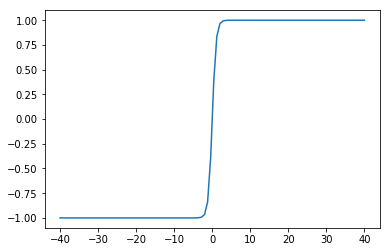

In [8]:
x = np.linspace(-40, 40, 100)

def tanh_y(x):
    return np.tanh(x)

tanh_y = tanh_y(x)
print(x)
print(tanh_y)

plt.plot(x, tanh_y)
plt.show()

# *Hidden Layers*

### Generating Data that contains Nonlinearity

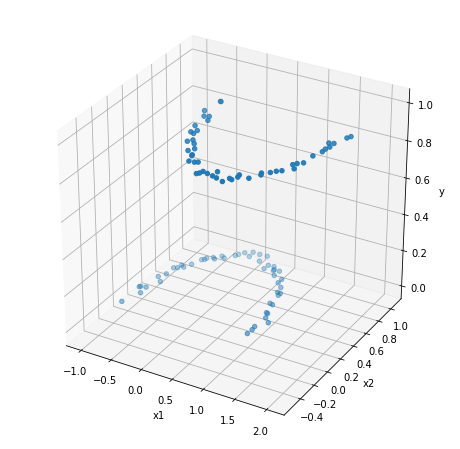

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons

data = make_moons(random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features[0], features[1], labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

### Training a Neural Network using Scikit-Learn

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

features['bias'] = 1

shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]

## Logistic Regression
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_features, train_labels)
log_predictions = lr.predict(test_features)
log_accuracy = accuracy_score(test_labels, log_predictions)

## Neural Network
nn = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic')
nn.fit(train_features, train_labels)
nn_predictions = nn.predict(test_features)
nn_accuracy = accuracy_score(test_labels, nn_predictions)

print(log_accuracy, nn_accuracy)

0.88 0.48


### Hidden Layer with Multiple Neurons

In [20]:
neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for item in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(item,), activation='logistic')
    nn.fit(train_features, train_labels)
    nn_predictions = nn.predict(test_features)
    nn_accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(nn_accuracy)
    
print(accuracies)

/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.48, 0.72, 0.84, 0.86, 0.8, 0.86]


/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Multiple Hidden Layers

In [24]:
neurons = [1, 5, 10, 15, 20, 25]
nn_accuracies = []

for item in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(item,item),
                       activation='relu', max_iter = 1000)
    nn.fit(train_features, train_labels)
    nn_predictions = nn.predict(test_features)
    nn_accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(nn_accuracy)
    
print(nn_accuracies)

/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.52, 0.88, 1.0, 1.0, 1.0, 1.0]
